In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

df = pd.read_csv('/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/d-optimal/spmm-of-d-optimal-data/lr-150000-lc-100000-rc-50000/1918-nonsquare-spmm-over-3s.csv') 

In [2]:
# data를 row 단위로 읽으며, sp_smdm과 bz_smsm중 빠른 label 저장
real_label = []

for i in range(len(df)):
    latency_list = []
    latency_list.append(df.loc[i,'sp_smdm'])
    latency_list.append(df.loc[i,'bz_smsm'])
    real_label.append(latency_list.index(min(latency_list)))

In [3]:
# x축에 사용 될, threshold list
rd_threshold_list = np.arange(0.01, 0.26, 0.01)

# y축에 사용 될, 각 threshold에 따른 accuracy list
accuracy_list = []

In [4]:
# 각 threshold를 적용했을 때의 accuracy 계산
for rd_threshold in rd_threshold_list:
    
    # 예측 라벨 저장
    pred_label = []
    for i in range(len(df)):
        # rd가 rd_threshold보다 작으면, breeze smsm 예측
        if (df.loc[i,'rd'] <= rd_threshold):
            pred_label.append(1)
        # rd가 rd_threshold보다 크면, spark smdm 예측
        else:
            pred_label.append(0)
    
    # pred_label과 real_label 간 분류 정확도 계산 후 저장
    accuracy_list.append(accuracy_score(real_label, pred_label))

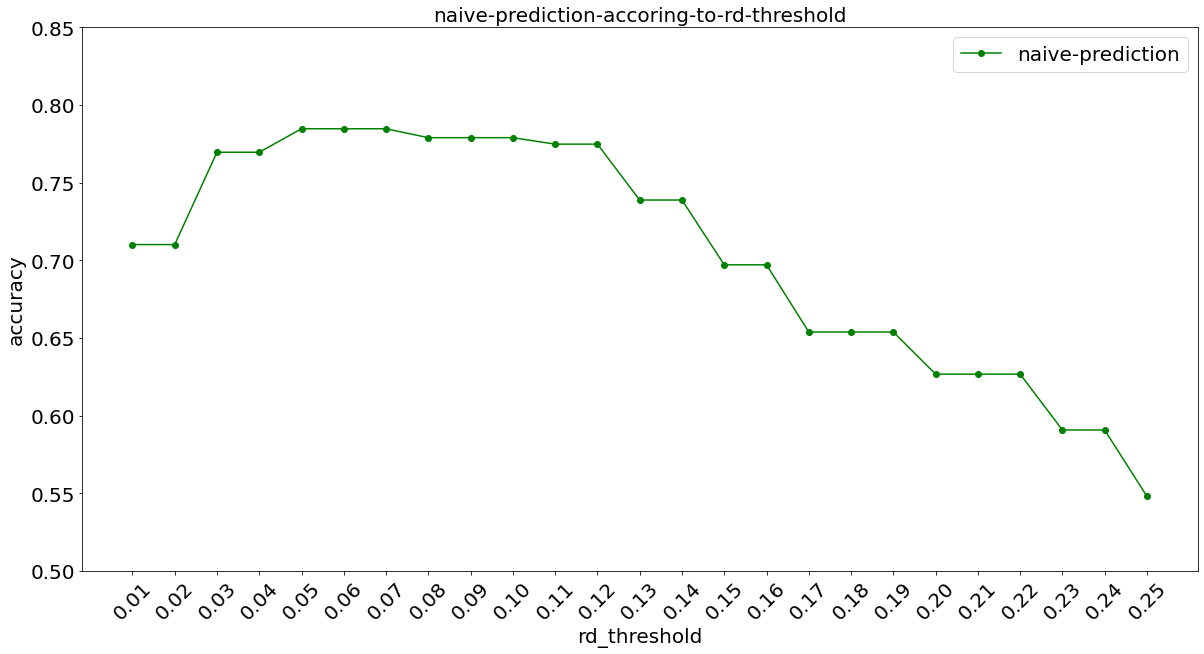

In [6]:
plt.figure(figsize=(20,10))
plt.plot(rd_threshold_list,accuracy_list, color='green', marker='o', linestyle='solid', label='naive-prediction') 

plt.legend(loc="upper right")

plt.title("naive-prediction-accoring-to-rd-threshold")
plt.ylabel("accuracy")
plt.xlabel("rd_threshold")

plt.rc('axes', titlesize=20) # title 크기
plt.rc('axes', labelsize=20) # x,y축 label 크기
plt.rc('xtick', labelsize=20) # x축 눈금 크기
plt.rc('ytick', labelsize=20) # y축 눈금 크기
plt.rc('legend', fontsize=20) # 범례 크기

plt.xticks(rd_threshold_list, rotation=45)
plt.yticks(np.arange(0.5,0.9,0.05))

plt.show()
